In [1]:
import matplotlib.pyplot as plt
import utils
import numerical_hysteresis
import synthetic
import optimization
import torch, botorch
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\dubey\Documents\3. Projects\Accelerator-Research\Hysteresis-Data.csv", engine='python')

print(data)

    Current  B-fld
0     186.0  0.237
1     184.0  0.236
2     183.0  0.235
3     181.0  0.234
4     180.0  0.234
5     179.0  0.233
6     177.0  0.232
7     176.0  0.231
8     175.0  0.231
9     176.0  0.231
10    177.0  0.232
11    179.0  0.233
12    180.0  0.234
13    181.0  0.234
14    183.0  0.235
15    184.0  0.236
16    186.0  0.237
17    187.0  0.237
18    188.0  0.238
19    190.0  0.239
20    191.0  0.240
21    193.0  0.241
22    194.0  0.242
23    195.0  0.243
24    197.0  0.244
25    195.0  0.243
26    194.0  0.242
27    193.0  0.241
28    191.0  0.241
29    190.0  0.240
30    188.0  0.239
31    187.0  0.238
32    186.0  0.237


In [6]:
# Global parameters
n = 100
h = torch.tensor(data['Current'])
b = torch.tensor(data['B-fld'])

h_min = 170
h_max = 200
b_min = 0
b_max = 0.5

xx, yy=utils.generate_asym_mesh(h_min, h_max, n)

states=numerical_hysteresis.state(xx, yy, h_max, h)

alpha = 100
num_iterations = 5000

In [7]:
h_nd = botorch.utils.transforms.normalize(h, torch.tensor([h_min, h_max]))
b_nd = botorch.utils.transforms.normalize(b, torch.tensor([b_min, b_max]))

C:\Users\dubey\Documents\GitHub\bayesian_hysteresis\numerical_hysteresis.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hs = torch.cat((torch.tensor([-h_sat]), torch.tensor(h)))  # H_0=-t, negative saturation limit


0 iterations completed
500 iterations completed
1000 iterations completed
1500 iterations completed
2000 iterations completed
2500 iterations completed
3000 iterations completed
3500 iterations completed
4000 iterations completed
4500 iterations completed
Loss function converges to 4.207785627739733e-15


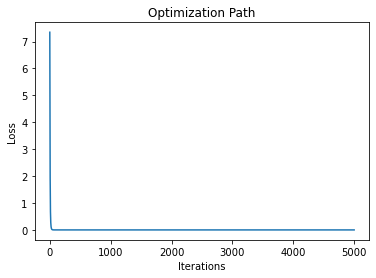

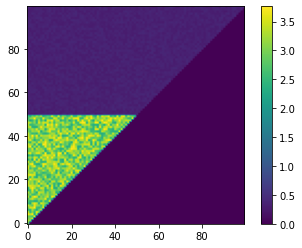

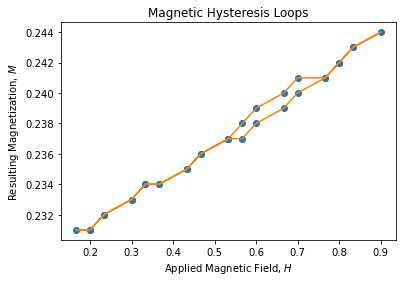

In [15]:
history_f, x_star, num_points, h, b, b_pred, b_start = optimization.optimize(n, h_nd, m, h_max, b_nd, optimization.l, alpha, num_iterations)

# Plot the trajectory of the loss function
optimization.plot_lfunc(history_f)
plt.show()

# Plot optimized hysterion density distribution
optimization.plot_density(x_star, num_points)
plt.show()

# Plot H x M hysteresis loop
optimization.plot_loops(h, b, b_pred, b_start)
plt.show()

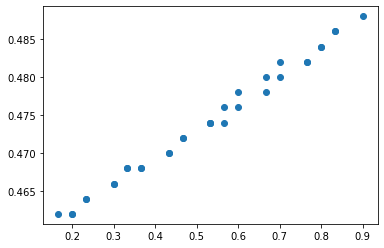

In [11]:
plt.plot(h_nd, b_nd, 'o')

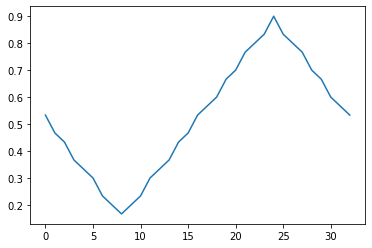

In [9]:
plt.plot(h_nd)

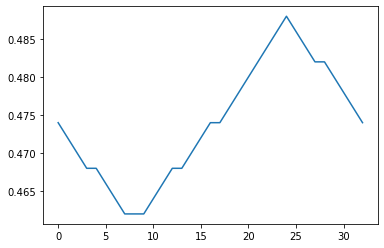

In [17]:
plt.plot(b_nd)